In [85]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor
import xgboost
from pathlib import Path
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.backends.backend_pdf import PdfPages

## Reading the drugnames

In [44]:
drugnames = ["Erlotinib", "Rapamycin", "Venetoclax", "Venetoclax", "MG-132", 
"Paclitaxel", "Cyclopamine", "AZ628", "Sorafenib", "Tozasertib", 
"Imatinib", "NVP-TAE684", "Crizotinib", "AZD-0530", "S-Trityl-L-cysteine", 
"Z-LLNle-CHO", "Dasatinib", "GNF-2", "CGP-60474", "CGP-082996", 
"A-770041", "WH-4-023", "WZ-1-84", "BI-2536", "BMS-536924", "BMS-509744", 
"CMK", "Pyrimethamine", "JW-7-52-1", "A-443654", "GW843682X", 
"Entinostat", "Parthenolide", "KIN001-135", "TGX221", "Bortezomib", 
"XMD8-85", "Roscovitine", "Salubrinal", "Lapatinib", "GSK269962A", 
"Doxorubicin", "Etoposide", "Gemcitabine", "Mitomycin C", "Vinorelbine", 
"NSC-87877", "Bicalutamide...49", "QS11", "CP466722", "Midostaurin", 
"CHIR-99021...53", "AP-24534", "AZD6482", "JNK-9L", "PF-562271", 
"HG-6-64-1", "JQ1", "JQ12", "DMOG", "FTI-277", "OSU-03012", "Shikonin", 
"AKT inhibitor VIII", "Embelin", "FH535", "PAC-1", "IPA-3", "GSK-650394", 
"BAY 61-3606", "5-Fluorouracil", "Thapsigargin", "Obatoclax Mesylate", 
"BMS-754807", "Linsitinib", "Bexarotene", "Bleomycin...78", "LFM-A13", 
"GW-2580", "Luminespib", "Phenformin", "Bryostatin 1", "Pazopanib", 
"LAQ824", "Epothilone B", "GSK1904529A", "BMS-345541", "Tipifarnib", 
"BMS-708163...90", "Ruxolitinib", "AS601245", "SB-715992", "TL-2-105", 
"AT-7519", "TAK-715", "BX-912", "ZSTK474", "AS605240", "Genentech Cpd 10", 
"GSK1070916", "KIN001-102", "LY317615", "GSK429286A", "FMK", 
"QL-XII-47", "CAL-101", "UNC0638...108", "XL-184", "WZ3105", 
"XMD14-99", "AC220", "CP724714", "JW-7-24-1", "NPK76-II-72-1", 
"STF-62247", "NG-25", "TL-1-85", "VX-11e", "FR-180204", "Tubastatin A", 
"Zibotentan, ZD4054", "Sepantronium bromide", "NSC-207895", "VNLG/124", 
"AR-42", "CUDC-101", "PXD101, Belinostat", "I-BET 151", "CAY10603", 
"ABT-869", "BIX02189", "CH5424802", "EKB-569", "GSK2126458", 
"KIN001-236", "KIN001-244", "KIN001-055", "KIN001-260", "KIN001-266", 
"Masitinib", "MP470", "MPS-1-IN-1", "NVP-BHG712", "OSI-930", 
"OSI-027", "CX-5461", "PHA-793887", "PI-103", "PIK-93", "SB52334", 
"TPCA-1", "TG101348", "Foretinib", "Y-39983", "YM201636", "AV-951", 
"GSK690693", "SNX-2112", "QL-XI-92", "XMD13-2", "QL-X-138", "XMD15-27", 
"T0901317", "EX-527", "THZ-2-49", "KIN001-270", "THZ-2-102-1", 
"AICAR", "Camptothecin", "Vinblastine", "Cisplatin", "Cytarabine", 
"Docetaxel", "Methotrexate", "ATRA", "Gefitinib", "Navitoclax", 
"Vorinostat", "Nilotinib", "RDEA119...181", "CI-1040", "Temsirolimus", 
"Olaparib", "ABT-888", "Bosutinib", "Lenalidomide", "Axitinib", 
"AZD7762", "GW 441756", "CEP-701", "SB216763", "17-AAG", "VX-702", 
"AMG-706", "KU-55933", "Elesclomol", "Afatinib", "Vismodegib", 
"PLX-4720", "BX-795", "NU-7441", "SL 0101-1", "BIRB 0796", "JNK Inhibitor VIII", 
"Wee1 Inhibitor", "Nutlin-3a (-)", "PD173074", "ZM447439", "RO-3306", 
"MK-2206", "Palbociclib", "Dactolisib", "Pictilisib", "AZD8055", 
"PD0325901", "SB590885", "AZD6244...218", "AZD6482", "CCT007093", 
"EHT 1864", "BMS-708163...222", "BMS-536924", "Cetuximab", "PF-4708671", 
"JNJ-26854165", "HG-5-113-01", "HG-5-88-01", "TW 37", "XMD11-85h", 
"ZG-10", "XMD8-92", "QL-VIII-58", "CCT018159", "AG-014699", "GSK269962A", 
"SB-505124", "Tamoxifen", "QL-XII-61", "JQ1", "PFI-1", "IOX2", 
"UNC0638...243", "YK-4-279", "CHIR-99021...245", "(5Z)-7-Oxozeaenol", 
"piperlongumine", "Daporinad", "Talazoparib", "rTRAIL", "UNC1215", 
"SGC0946", "XAV939", "PLX-4720", "Trametinib", "Dabrafenib", 
"Temozolomide", "Afatinib", "Bleomycin...259", "SN-38", "Olaparib", 
"AZD6244...262", "Bicalutamide...263", "RDEA119...264", "Pictilisib", 
"Pevonedistat"]

In [114]:
drugnames = ["BI-2536",
"BMS-345541",
"BMS-536924",
"BMS-754807",
"KU-55933",
"MG-132",
"MK-2206",
"OSI-027",
"PLX-4720",
"Afatinib",
"Axitinib",
"Bortezomib",
"Camptothecin",
"Cisplatin",
"Crizotinib",
"Cytarabine",
"Dabrafenib",
"Dasatinib",
"Docetaxel",
"Entinostat",
"Erlotinib",
"Foretinib",
"Gefitinib",
"Gemcitabine",
"Lapatinib",
"Linsitinib",
"Navitoclax",
"Nilotinib",
"Olaparib",
"Paclitaxel",
"Palbociclib",
"Ruxolitinib",
"Sorafenib",
"Talazoparib",
"Tamoxifen",
"Temozolomide",
"Tozasertib",
"Trametinib",
"Vinblastine",
"Vinorelbine",
"Vorinostat"]

shortdrugs=["Axitinib",
"Crizotinib",
"Dabrafenib",
"Erlotinib",
"Lapatinib",
"Nilotinib",
"Olaparib",
"Palbociclib",
"Ruxolitinib",
"Talazoparib",
"Trametinib"]

## Running xgboost for each drug to determine importnat features

In [121]:
topfeature = []
models = []
accuracies = []
aucs = []

for i in range(1,len(drugnames)):
    print(drugnames[i])
    matrix_train = pd.read_csv('DESEQ2/xgboostinput/matrix_train_'+drugnames[i]+'.txt', sep=" ")
    matrix_test = pd.read_csv('DESEQ2/xgboostinput/matrix_test_'+drugnames[i]+'.txt', sep=" ") 
    labls_train = pd.read_csv('DESEQ2/xgboostinput/labls_train_'+drugnames[i]+'.txt', sep=" ") 
    labls_test = pd.read_csv('DESEQ2/xgboostinput/labls_test_'+drugnames[i]+'.txt', sep=" ") 

    model = XGBClassifier(scale_pos_weight=50)
    model.fit(matrix_train, labls_train)
    # make predictions for test data
    y_pred = model.predict(matrix_test)
    y_pred_prob = model.predict_proba(matrix_test)
    predictions = [round(value) for value in y_pred_prob[:,1]]
    
    
    # evaluate predictions
    accuracy = accuracy_score(labls_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    accuracies.append(accuracy)

    print(model.feature_importances_)

    sorted_idx = model.feature_importances_.argsort()

    print(sorted_idx)

    plt.barh(matrix_train.columns[sorted_idx[17722:17737]], model.feature_importances_[sorted_idx[17722:17737]])
    plt.xlabel("Xgboost Feature Importance")
    plt.title(drugnames[i])
    plt.tight_layout()
    plt.savefig("Xgboost/"+drugnames[i]+"_topfeatures.png", format="png",facecolor=ax.get_facecolor(), edgecolor='none', dpi=300)
    topfeature.append(matrix_train.columns[sorted_idx[17722:17737]])
    plt.close()
    
    fpr, tpr, thresholds = metrics.roc_curve(labls_test, y_pred_prob[:,1])

    print(auc(fpr, tpr))
    aucs.append(auc(fpr, tpr))
    

    models.append(model)




BMS-345541
Accuracy: 86.19%
[0.        0.        0.0028341 ... 0.        0.        0.       ]
[    0 11748 11749 ...  5425  7901 16213]
0.7726244343891402
BMS-536924
Accuracy: 87.40%
[0. 0. 0. ... 0. 0. 0.]
[    0 11789 11790 ...  4818 15724 13362]
0.6384057971014492
BMS-754807
Accuracy: 88.36%
[0.00114153 0.         0.00135698 ... 0.         0.         0.        ]
[ 8868 11751 11752 ... 11295   965  5554]
0.6923236946120241
KU-55933
Accuracy: 90.11%
[0. 0. 0. ... 0. 0. 0.]
[    0 11756 11757 ...  3320  3657 16504]
0.6019927536231884
MG-132
Accuracy: 94.57%
[0.         0.0014529  0.00299546 ... 0.         0.         0.        ]
[    0 11800 11801 ...  4249 17110  6728]
0.7318501170960187
MK-2206
Accuracy: 88.37%
[0.0003592 0.        0.        ... 0.        0.        0.       ]
[ 8868 11763 11764 ... 12870 17372  7725]
0.6713219026548672
OSI-027
Accuracy: 91.73%
[0. 0. 0. ... 0. 0. 0.]
[    0 11779 11780 ... 17444 14177  7264]
0.8355734767025089
PLX-4720
Accuracy: 90.49%
[0.         0.0

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


IndexError: list index out of range

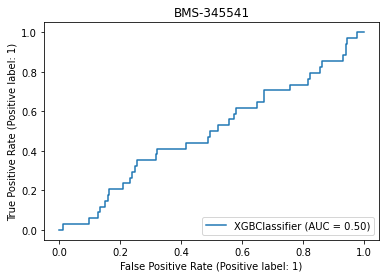

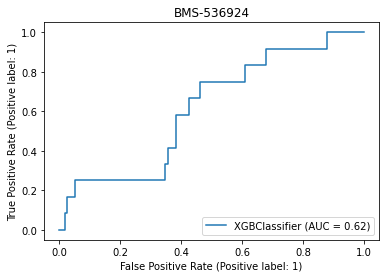

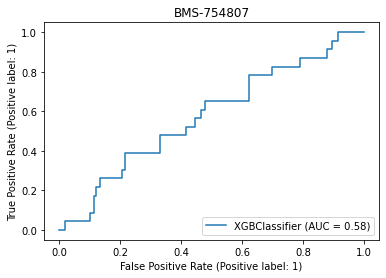

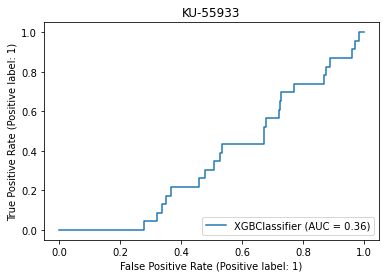

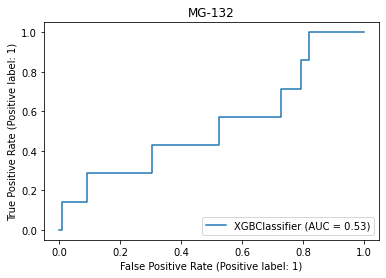

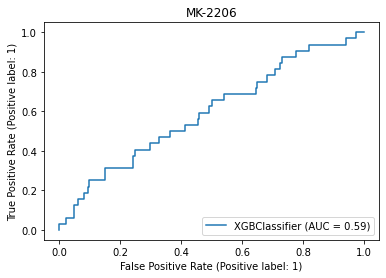

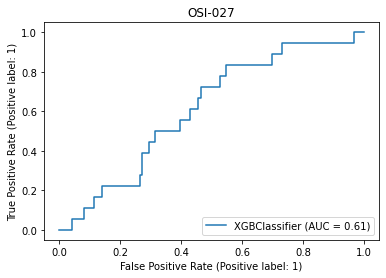

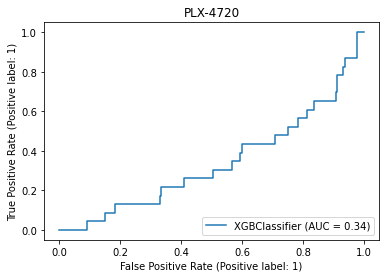

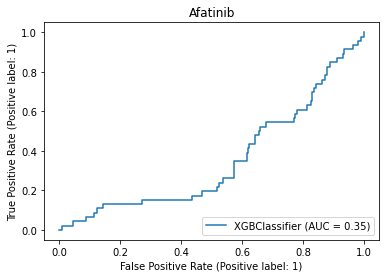

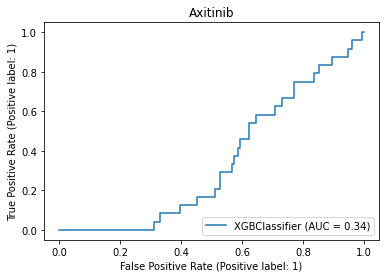

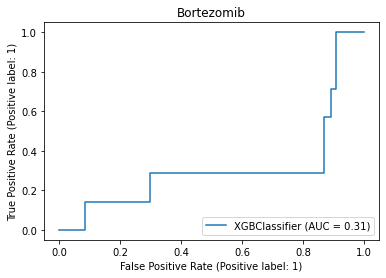

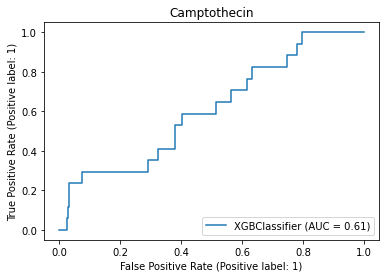

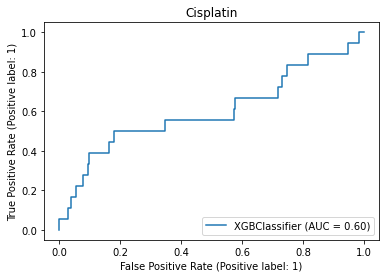

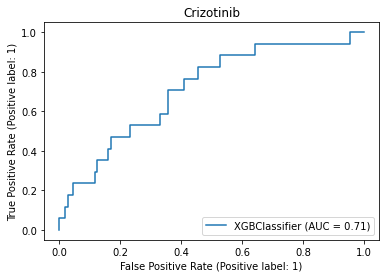

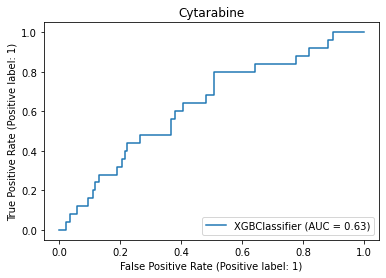

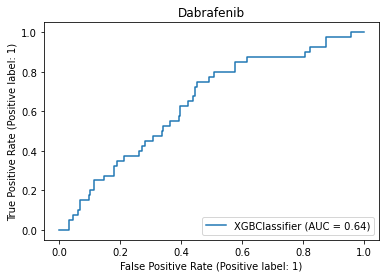

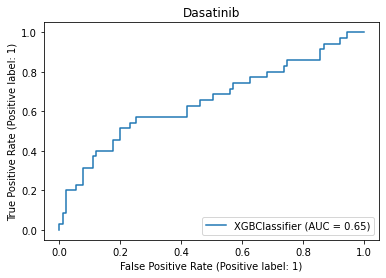

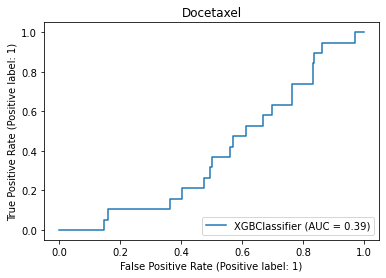

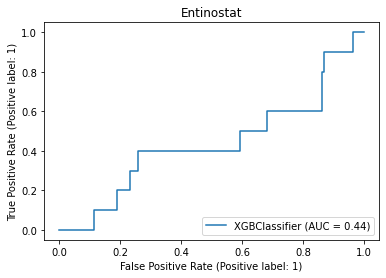

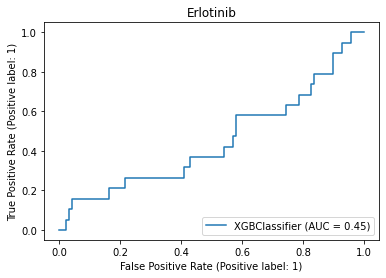

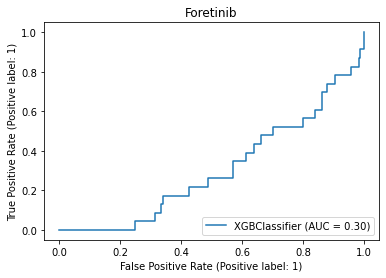

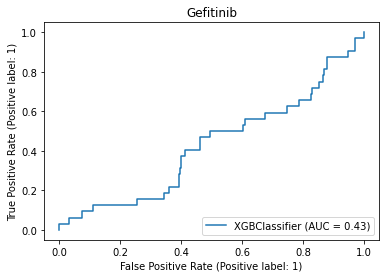

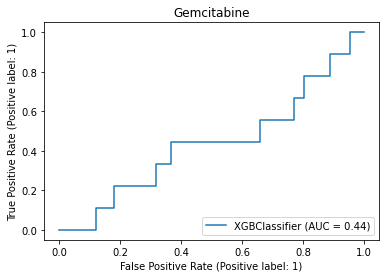

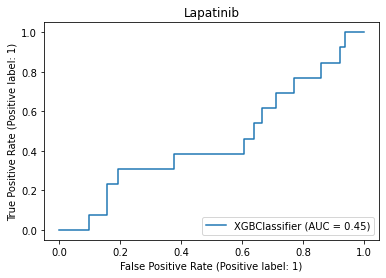

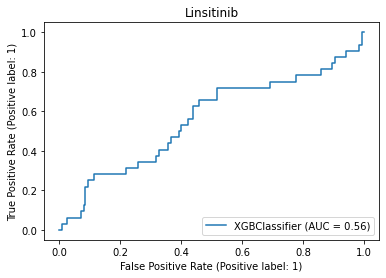

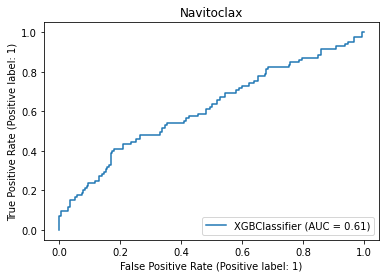

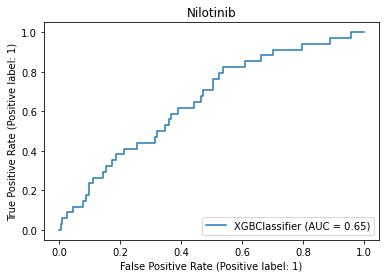

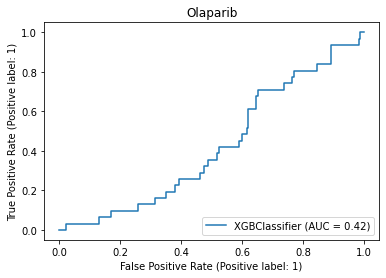

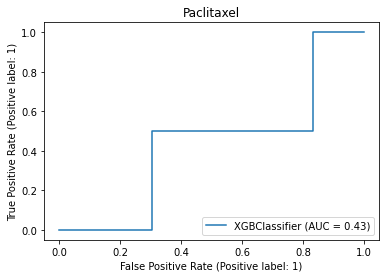

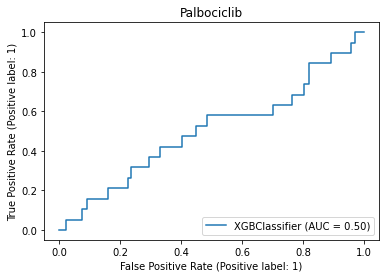

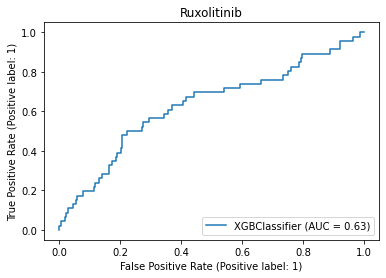

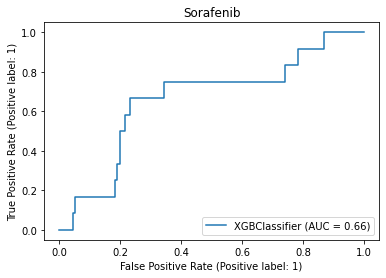

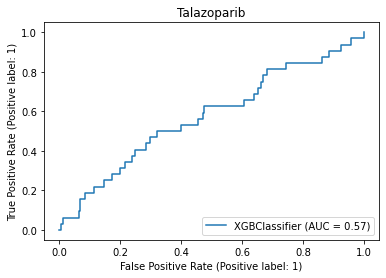

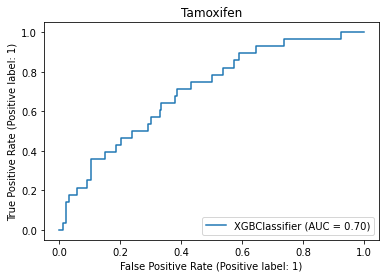

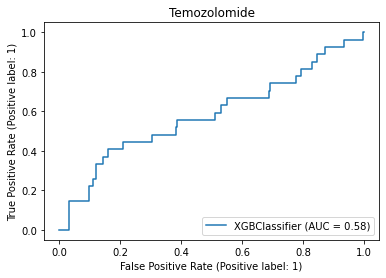

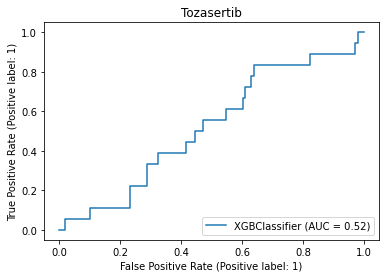

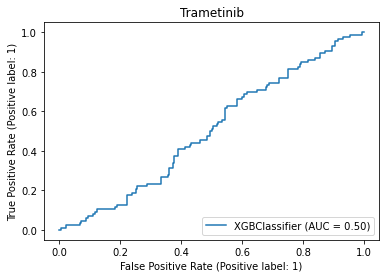

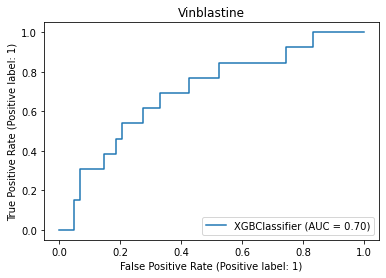

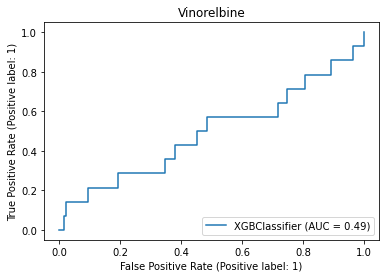

In [122]:
#ax = plt.gca()

for i in range(1,len(drugnames)):
    matrix_test = matrix_test = pd.read_csv('DESEQ2/xgboostinput/matrix_test_'+drugnames[i]+'.txt', sep=" ") 
    labls_test = pd.read_csv('DESEQ2/xgboostinput/labls_test_'+drugnames[i]+'.txt', sep=" ") 
    RocCurveDisplay.from_estimator(models[i], matrix_test, labls_test)#, ax = ax)
    #plt.legend()
    #plt.show()
    plt.title(drugnames[i])
    plt.savefig("Xgboost/"+drugnames[i]+"_roc_curve.png", format="png",facecolor=ax.get_facecolor(), edgecolor='none', dpi=300)
    #ax.close
    #plt.close()





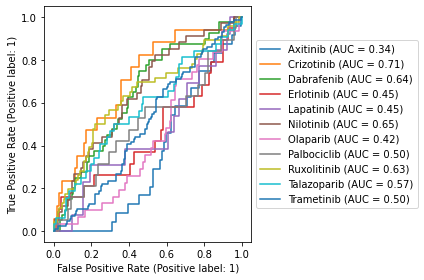

In [123]:
ax = plt.gca()

for i in range(1,len(drugnames)):
    if drugnames[i] in shortdrugs:
        matrix_test = matrix_test = pd.read_csv('DESEQ2/xgboostinput/matrix_test_'+drugnames[i]+'.txt', sep=" ") 
        labls_test = pd.read_csv('DESEQ2/xgboostinput/labls_test_'+drugnames[i]+'.txt', sep=" ") 
        RocCurveDisplay.from_estimator(models[i], matrix_test, labls_test, ax = ax, name=drugnames[i])
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
ax.figure.savefig("Xgboost/roc_curve.png", format="png",facecolor=ax.get_facecolor(), edgecolor='none', dpi=300)


In [142]:
prediction_vals = []

for i in shortdrugs:
    print(i)
    matrix_train = pd.read_csv('DESEQ2/xgboostinput/matrix_train_'+i+'.txt', sep=" ")
    matrix_test = pd.read_csv('DESEQ2/xgboostinput/matrix_test_'+i+'.txt', sep=" ") 
    labls_train = pd.read_csv('DESEQ2/xgboostinput/labls_train_'+i+'.txt', sep=" ") 
    labls_test = pd.read_csv('DESEQ2/xgboostinput/labls_test_'+i+'.txt', sep=" ") 

    model = XGBClassifier(scale_pos_weight=5)
    model.fit(matrix_train, labls_train)
    # make predictions for test data
    y_pred = model.predict(matrix_test)
    y_pred_prob = model.predict_proba(matrix_test)
    
    prediction_vals.append(y_pred_prob[:,1])

Axitinib
Crizotinib
Dabrafenib
Erlotinib
Lapatinib
Nilotinib
Olaparib
Palbociclib
Ruxolitinib
Talazoparib
Trametinib


In [168]:
topfeature = []
models = []
accuracies = []
aucs = []

for i in shortdrugs:
    print(i)
    matrix_train = pd.read_csv('DESEQ2/xgboostinput/matrix_train_'+i+'.txt', sep=" ")
    matrix_test = pd.read_csv('DESEQ2/xgboostinput/matrix_test_'+i+'.txt', sep=" ") 
    labls_train = pd.read_csv('DESEQ2/xgboostinput/labls_train_'+i+'.txt', sep=" ") 
    labls_test = pd.read_csv('DESEQ2/xgboostinput/labls_test_'+i+'.txt', sep=" ") 

    model = XGBClassifier(scale_pos_weight=5)
    model.fit(matrix_train, labls_train)
    # make predictions for test data
    y_pred = model.predict(matrix_test)
    y_pred_prob = model.predict_proba(matrix_test)
    
    prediction_vals.append(y_pred_prob[:,1])
    predictions = [round(value) for value in y_pred_prob[:,1]]
    
    
    # evaluate predictions
    accuracy = accuracy_score(labls_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    accuracies.append(accuracy)

    print(model.feature_importances_)

    sorted_idx = model.feature_importances_.argsort()

    print(sorted_idx)

    #plt.barh(matrix_train.columns[sorted_idx[17722:17737]], model.feature_importances_[sorted_idx[17722:17737]])
    #plt.xlabel("Xgboost Feature Importance")
    #plt.title(drugnames[i])
    #plt.tight_layout()
    #plt.savefig("Xgboost/"+drugnames[i]+"_topfeatures.png", format="png",facecolor=ax.get_facecolor(), edgecolor='none', dpi=300)
    topfeature.append(matrix_train.columns[sorted_idx[17722:17737]])
    plt.close()
    
    fpr, tpr, thresholds = metrics.roc_curve(labls_test, y_pred_prob[:,1])

    print(auc(fpr, tpr))
    aucs.append(auc(fpr, tpr))
    

    models.append(model)


Axitinib
Accuracy: 90.04%
[0. 0. 0. ... 0. 0. 0.]
[    0 11785 11786 ... 10081  5392  2882]
0.6035513361462728
Crizotinib
Accuracy: 89.15%
[0. 0. 0. ... 0. 0. 0.]
[    0 11797 11798 ...  1652  6129  1178]
0.7867647058823529
Dabrafenib
Accuracy: 84.44%
[0.         0.00107658 0.         ... 0.         0.         0.        ]
[    0 11752 11753 ...  2313  7982  3588]
0.7556451612903226
Erlotinib
Accuracy: 82.91%
[0.         0.00080342 0.00016965 ... 0.         0.         0.        ]
[    0 11789 11790 ...  4417  8649 13948]
0.6423200859291085
Lapatinib
Accuracy: 88.98%
[0. 0. 0. ... 0. 0. 0.]
[    0 11785 11786 ...  7308   251  1508]
0.7793522267206479
Nilotinib
Accuracy: 84.30%
[0.00273658 0.         0.00196197 ... 0.         0.         0.        ]
[ 8868 11749 11750 ...  6836  7662 10840]
0.737697963800905
Olaparib
Accuracy: 85.93%
[0. 0. 0. ... 0. 0. 0.]
[    0 11771 11772 ...  3569  7496  6776]
0.6390433815350389
Palbociclib
Accuracy: 91.47%
[0.         0.00580708 0.         ... 0.    

In [176]:
pd.DataFrame(topfeature)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,TACR2,AGK,ARIH2OS,PIK3C2B,FAM46D,CPS1,RNF144B,CECR6,AACS,WDR41,C6orf170,ZNF711,SRSF2,SEPT6,TRMT1
1,CCNL2,GCLC,OSM,ASTN2,HINT1P1,NUDT6,SEPT3,TULP4,CHP2,ZNF711,WNK4,ZNF654,RBM22,TRAF3,AP1M1
2,HCFC1R1,UPP2,ACTL6A,LDLRAD3,LYZ,CAMK2B,GSTO1,GATM,OR52A5,PTPLB,TIAM1,CPNE7,SRP54,TUFT1,LPXN
3,UBR3,PPP2R2A,PPP4R2,CYP2D6,C19orf44,ENOX2,AKAP11,CRBN,FAM3B,NA.213,PYDC1,COL25A1,MFN2,LCN2,TMEM132C
4,EDDM3A,P2RY14,KRT15,LASP1,SH3GL1,CCL1,TEK,TMCO5A,KCNIP4,KCNK15,MATR3,LRRC8E,CHRNA1,NCAPD2,ATP8B1
5,PHACTR3,HFE,ATXN7L2,IL2RG,NEUROD4,OR10A7,C8A,CYP46A4P,BPIFA4P,GALM,NFKB2,MTA2,ARMC9,KIAA1609,TAGAP
6,ATP6V0E1,TMEM151A,DNM3,AMELY,NA.25,SEC22B,HEG1,SNHG14,OAT,C4orf3,ELOVL4,LRRC39,HTATIP2,HNRNPA1L2,RAB11FIP5
7,WDR27,NXT1,DAPP1,PAQR4,DMKN,ARHGEF39,POLR3G,POM121L2,TAS2R7,HOXD10,DDX50,DIAPH1,CMTM3,RAX2,TTLL7
8,CYP3A5,ICMT,NHSL1,ACER1,TBC1D8,KCTD11,ESPNL,COCH,DIRC2,C5orf51,IGF2BP1,CCDC88C,XDH,WIPI2,NCKAP1
9,VOPP1,PHF14,ITPR3,NUP160,ZDHHC23,NAE1,BTNL3,SMIM2,DPCR1,TMPRSS11D,GORASP2,SLFN11,LIMCH1,AEBP1,TRIML2


In [157]:
a_file = open("DSSX.pred.txt", "w")
for row in prediction_vals:
    np.savetxt(a_file, row)

a_file.close()

In [154]:
len(prediction_vals[3])

117

In [158]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [164]:
y_pred_prob[:,1]

array([1.17308684e-01, 1.28968433e-02, 2.93421512e-03, 6.50430262e-01,
       2.72221137e-02, 5.23298606e-02, 5.74102858e-03, 9.52824391e-03,
       1.12996818e-02, 2.39945948e-01, 1.23809040e-01, 1.83131755e-03,
       5.76760154e-04, 1.17627683e-03, 9.29524601e-01, 9.25449371e-01,
       8.28476369e-01, 1.61499251e-02, 2.45165199e-01, 4.70373576e-04,
       1.71114892e-01, 3.89177143e-03, 9.74930942e-01, 6.47697086e-03,
       2.86607206e-01, 5.41830249e-03, 2.21028706e-04, 7.73786660e-03,
       1.08070187e-02, 2.27306247e-01, 1.65237044e-03, 1.16383787e-02,
       3.41903814e-03, 3.17143410e-01, 6.32387817e-01, 7.71775723e-01,
       8.42168093e-01, 3.07367765e-04, 2.58023739e-02, 9.16046556e-04,
       8.01260233e-01, 6.70679271e-01, 6.14460371e-02, 2.29540449e-02,
       2.03176611e-03, 2.11719554e-02, 2.51492648e-03, 4.85373801e-03,
       1.45716602e-02, 9.55320358e-01, 1.12473024e-02, 6.89006830e-03,
       2.26796567e-01, 1.02156913e-02, 8.89035655e-05, 8.86032820e-01,
      

In [48]:
i=10
matrix_train = pd.read_csv('DESEQ2/xgboostinput/matrix_train_'+drugnames[i]+'.txt', sep=" ")
matrix_test = pd.read_csv('DESEQ2/xgboostinput/matrix_test_'+drugnames[i]+'.txt', sep=" ") 
labls_train = pd.read_csv('DESEQ2/xgboostinput/labls_train_'+drugnames[i]+'.txt', sep=" ") 
labls_test = pd.read_csv('DESEQ2/xgboostinput/labls_test_'+drugnames[i]+'.txt', sep=" ") 

labls_train.index = matrix_train.index

labls_test.index = matrix_test.index

## Cross validation to determine the weight on 1s - imporrtant for sparse data

Best: 0.809575 using {'scale_pos_weight': 50}
0.793095 (0.106796) with: {'scale_pos_weight': 1}
0.799082 (0.123448) with: {'scale_pos_weight': 5}
0.794201 (0.125126) with: {'scale_pos_weight': 20}
0.809575 (0.099925) with: {'scale_pos_weight': 50}
0.798776 (0.119105) with: {'scale_pos_weight': 100}
0.794980 (0.115711) with: {'scale_pos_weight': 350}
0.783327 (0.119908) with: {'scale_pos_weight': 500}
0.779473 (0.128541) with: {'scale_pos_weight': 700}
0.777626 (0.135672) with: {'scale_pos_weight': 1000}


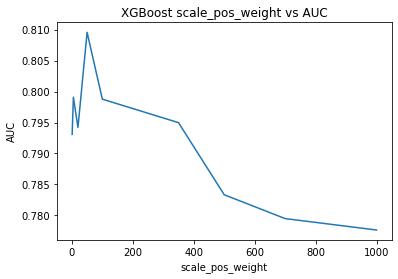

In [49]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier()
# define grid
#weights = [1, 10, 25, 50, 75, 99, 100, 1000]

#Best: 0.761988 using {'scale_pos_weight': 100}
#0.736605 (0.051651) with: {'scale_pos_weight': 1}
#0.739227 (0.060827) with: {'scale_pos_weight': 10}
#0.740623 (0.053788) with: {'scale_pos_weight': 25}
#0.741118 (0.062174) with: {'scale_pos_weight': 50}
#0.758507 (0.059714) with: {'scale_pos_weight': 75}
#0.758740 (0.057962) with: {'scale_pos_weight': 99}
#0.761988 (0.063769) with: {'scale_pos_weight': 100}
#0.760341 (0.072132) with: {'scale_pos_weight': 1000}

weights = [1, 5, 20, 50, 100, 350, 500, 700, 1000]

param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(matrix_train, labls_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


import matplotlib.pyplot as pyplot
# plot
pyplot.errorbar(weights, means)#, yerr=stds)
pyplot.title("XGBoost scale_pos_weight vs AUC")
pyplot.xlabel('scale_pos_weight')
pyplot.ylabel('AUC')
pyplot.savefig('scale_pos_weight_AUC_"Axitinib".png')

In [55]:
(len(labls_train)-labls_train.sum())/labls_train.sum()

x    11.465116
dtype: float64

In [13]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier()
# define grid
#weights = [1, 10, 25, 50, 75, 99, 100, 1000]

#Best: 0.761988 using {'scale_pos_weight': 100}
#0.736605 (0.051651) with: {'scale_pos_weight': 1}
#0.739227 (0.060827) with: {'scale_pos_weight': 10}
#0.740623 (0.053788) with: {'scale_pos_weight': 25}
#0.741118 (0.062174) with: {'scale_pos_weight': 50}
#0.758507 (0.059714) with: {'scale_pos_weight': 75}
#0.758740 (0.057962) with: {'scale_pos_weight': 99}
#0.761988 (0.063769) with: {'scale_pos_weight': 100}
#0.760341 (0.072132) with: {'scale_pos_weight': 1000}

weights = [1,3,5,7,9,11,13]

param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(matrix_train, labls_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
import matplotlib.pyplot as pyplot
# plot
pyplot.errorbar(weights, means)#, yerr=stds)
pyplot.title("XGBoost scale_pos_weight vs AUC")
pyplot.xlabel('scale_pos_weight')
pyplot.ylabel('AUC')
pyplot.savefig('scale_pos_weight_AUC_.png')

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Best: 0.781035 using {'scale_pos_weight': 5}
0.748469 (0.079686) with: {'scale_pos_weight': 1}
0.750679 (0.099904) with: {'scale_pos_weight': 3}
0.781035 (0.094594) with: {'scale_pos_weight': 5}
0.768052 (0.099653) with: {'scale_pos_weight': 7}
0.754660 (0.090351) with: {'scale_pos_weight': 9}
0.769336 (0.094338) with: {'scale_pos_weight': 11}
0.756899 (0.090858) with: {'scale_pos_weight': 13}


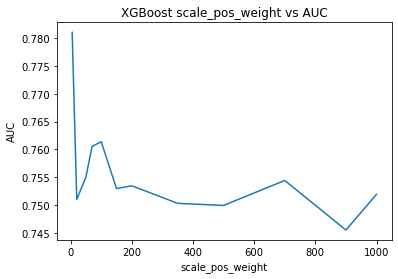

Accuracy: 90.04%
[0. 0. 0. ... 0. 0. 0.]
[    0 11785 11786 ... 10081  5392  2882]
0.6035513361462728


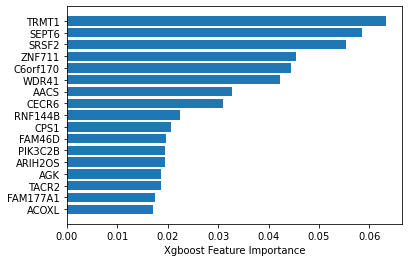

In [94]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics

model = XGBClassifier(scale_pos_weight=5)
model.fit(matrix_train, labls_train)
# make predictions for test data
y_pred = model.predict(matrix_test)
y_pred_prob = model.predict_proba(matrix_test)
predictions = [round(value) for value in y_pred_prob[:,1]]

# evaluate predictions
accuracy = accuracy_score(labls_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


print(model.feature_importances_)

sorted_idx = model.feature_importances_.argsort()

print(sorted_idx)

#gpl = plt.gca()
plt.barh(matrix_train.columns[sorted_idx[17720:17737]], model.feature_importances_[sorted_idx[17720:17737]])
plt.xlabel("Xgboost Feature Importance")
plt.savefig("Xgboost/"+drugnames[i]+"_topfeatures.png", format="png",facecolor=ax.get_facecolor(), edgecolor='none', dpi=300)


fpr, tpr, thresholds = metrics.roc_curve(labls_test, y_pred_prob[:,1])

print(auc(fpr, tpr))


In [62]:
aaaa = model.predict_proba(matrix_test)

In [104]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier()
# define grid
#weights = [1, 10, 25, 50, 75, 99, 100, 1000]

#Best: 0.761988 using {'scale_pos_weight': 100}
#0.736605 (0.051651) with: {'scale_pos_weight': 1}
#0.739227 (0.060827) with: {'scale_pos_weight': 10}
#0.740623 (0.053788) with: {'scale_pos_weight': 25}
#0.741118 (0.062174) with: {'scale_pos_weight': 50}
#0.758507 (0.059714) with: {'scale_pos_weight': 75}
#0.758740 (0.057962) with: {'scale_pos_weight': 99}
#0.761988 (0.063769) with: {'scale_pos_weight': 100}
#0.760341 (0.072132) with: {'scale_pos_weight': 1000}

weights = [100, 125, 150, 200, 500, 700, 900]

param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(matrix_train, labls_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot
pyplot.errorbar(weights, means)#, yerr=stds)
pyplot.title("XGBoost scale_pos_weight vs AUC")
pyplot.xlabel('scale_pos_weight')
pyplot.ylabel('AUC')
pyplot.savefig('scale_pos_weight_AUC.png')

Best: 0.769507 using {'scale_pos_weight': 700}
0.761988 (0.063769) with: {'scale_pos_weight': 100}
0.761866 (0.063825) with: {'scale_pos_weight': 125}
0.758318 (0.063294) with: {'scale_pos_weight': 150}
0.751603 (0.063404) with: {'scale_pos_weight': 200}
0.768448 (0.056899) with: {'scale_pos_weight': 500}
0.769507 (0.059335) with: {'scale_pos_weight': 700}
0.766272 (0.066395) with: {'scale_pos_weight': 900}


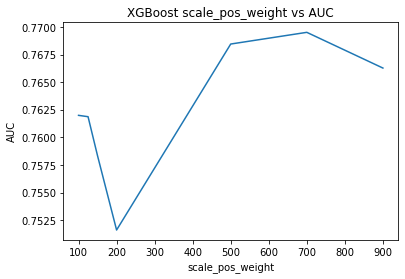

In [202]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

xgb_model = XGBClassifier()

test_params = {
 'max_depth':[4,8,12]
}

model = GridSearchCV(estimator = xgb_model,param_grid = test_params)
model.fit(matrix_train,labls_train)
print(model.best_params_)

{'max_depth': 8}
